# Recommendation system

In [238]:
# custom functions for this project
from functions import *
from functions_recs_temp import *

# dataframe libraries
import pandas as pd
import numpy as np

# graphing libraries
import matplotlib.pyplot as plt
import seaborn as sns; sns.set_style('ticks')

# rec system libraries
from gensim.models.doc2vec import Doc2Vec, TaggedDocument
from gensim import matutils, models
from gensim.utils import simple_preprocess

# miscellany
import re
from collections import Counter
import time
import gzip
import pickle

# reload functions/libraries when edited
%load_ext autoreload
%autoreload 2

# ignore warnings
import warnings
warnings.filterwarnings('ignore')

# increase column width of dataframe
pd.set_option('max_colwidth', 150)

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [223]:
# import necessary dataframe
with gzip.open('data/poetry_all_genres_df_edit.pkl', 'rb') as hello:
    df = pickle.load(hello)

In [224]:
# sort genres into umbrella genres
conditions = [
    df.genre == 'victorian', df.genre == 'romantic',
    df.genre == 'new_york_school', df.genre == 'new_york_school_2nd_generation', df.genre == 'confessional',
        df.genre == 'beat', df.genre == 'harlem_renaissance', df.genre == 'black_arts_movement',
    df.genre == 'imagist', df.genre == 'black_mountain', df.genre == 'language_poetry', df.genre == 'objectivist',
    df.genre == 'georgian', df.genre == 'fugitive'
]

# name umbrella genres, prepare 'other' to be dropped
choices = [
    'pre_1900', 'pre_1900',
    'metropolitan', 'metropolitan', 'metropolitan', 'metropolitan', 'metropolitan', 'metropolitan',
    'avant_garde', 'avant_garde', 'avant_garde', 'avant_garde',
    'other', 'other'
]

# convert data, leaving 'modern' untouched
df['umbrella_genre'] = np.select(conditions, choices, df.genre)

In [225]:
df.columns

Index(['poet_url', 'genre', 'poem_url', 'poet', 'title', 'poem_lines',
       'poem_string', 'clean_lines', 'num_lines', 'num_words', 'avg_len_line',
       'sentiment_polarity_score', 'sentiment_polarity',
       'sentiment_subjectivity_score', 'num_end_rhymes', 'end_rhyme_ratio',
       'end_rhyme', 'num_syllables', 'avg_syllables_word', 'lines_titled',
       'string_titled', 'string_cleaned', 'umbrella_genre'],
      dtype='object')

In [226]:
# drop poems in 'other' umbrella genre
df = df[df.umbrella_genre != 'other']

# take necessary columns
df = df[['title', 'poet', 'genre', 'umbrella_genre', 'num_lines', 'avg_len_line', 'sentiment_polarity',
         'end_rhyme', 'poem_url', 'string_titled']]

# reset the index
df.reset_index(drop=True, inplace=True)

In [227]:
# uncomment to save
with gzip.open('data/poetry_rec_system.pkl', 'wb') as goodbye:
    pickle.dump(df, goodbye, protocol=pickle.HIGHEST_PROTOCOL)
    
# uncomment to load
with gzip.open('data/poetry_rec_system.pkl', 'rb') as hello:
    df = pickle.load(hello)

In [228]:
# create corpus with just titled string of every poem
corpus = df.string_titled

In [229]:
model_corpus = []
for i, line in enumerate(corpus):
    tokens = simple_preprocess(line)
    model_corpus.append(TaggedDocument(tokens, [i]))

## Building the model
* parameters and loop borrow heavily from: https://medium.com/@morga046/multi-class-text-classification-with-doc2vec-and-t-sne-a-full-tutorial-55eb24fc40d3

In [264]:
model = Doc2Vec(vector_size=100, min_count=2, window=5, alpha=.025, min_alpha=0.00025, workers=8)
model.build_vocab(model_corpus)

collecting all words and their counts
PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
collected 43882 word types and 4376 unique tags from a corpus of 4376 examples and 1000709 words
Loading a fresh vocabulary
effective_min_count=2 retains 25044 unique words (57% of original 43882, drops 18838)
effective_min_count=2 leaves 981871 word corpus (98% of original 1000709, drops 18838)
deleting the raw counts dictionary of 43882 items
sample=0.001 downsamples 45 most-common words
downsampling leaves estimated 770218 word corpus (78.4% of prior 981871)
estimated required memory for 25044 words and 100 dimensions: 34307600 bytes
resetting layer weights


In [265]:
epochs = range(50)
for epoch in epochs:
    print(f'Epoch {epoch+1}')
    model.train(model_corpus,
                total_examples=model.corpus_count,
                epochs=model.epochs)
    # decrease the learning rate
    model.alpha -= 0.00025
    # fix the learning rate, no decay
    model.min_alpha = model.alpha

training model with 8 workers on 25044 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5


Epoch 1


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774263 effective words) took 0.8s, 994716 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 2


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774396 effective words) took 0.7s, 1080551 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 3


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774525 effective words) took 0.8s, 1031359 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 4


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774768 effective words) took 0.7s, 1061488 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 5


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774424 effective words) took 0.7s, 1052789 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 6


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774953 effective words) took 0.8s, 923428 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 7


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774454 effective words) took 0.8s, 985758 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 8


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774602 effective words) took 0.8s, 923865 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 9


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774447 effective words) took 1.0s, 809201 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 10


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774612 effective words) took 0.9s, 885292 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 11


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774842 effective words) took 0.7s, 1093660 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 12


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774620 effective words) took 0.7s, 1098848 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 13


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774568 effective words) took 0.8s, 946880 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 14


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (775055 effective words) took 0.8s, 917921 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 15


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774415 effective words) took 0.8s, 986392 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 16


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774597 effective words) took 0.7s, 1060934 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 17


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774681 effective words) took 0.8s, 960556 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 18


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774527 effective words) took 0.8s, 1013150 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 19


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774015 effective words) took 0.7s, 1049737 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 20


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (775072 effective words) took 0.8s, 994115 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 21


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774385 effective words) took 0.7s, 1061252 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 22


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774476 effective words) took 0.8s, 1006200 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 23


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774202 effective words) took 0.8s, 980222 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 24


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774404 effective words) took 0.8s, 986939 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 25


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774503 effective words) took 0.7s, 1065956 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 26


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774604 effective words) took 0.9s, 881293 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 27


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774876 effective words) took 0.8s, 1032937 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 28


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774598 effective words) took 0.8s, 991291 effective words/s
EPOCH 2 - PROGRESS: at 94.88% examples, 692239 words/s, in_qsize 11, out_qsize 0
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
work

Epoch 29


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774375 effective words) took 1.0s, 812355 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 30


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774438 effective words) took 0.9s, 879321 effective words/s
EPOCH 2 - PROGRESS: at 89.33% examples, 649327 words/s, in_qsize 15, out_qsize 0
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
work

Epoch 31


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774876 effective words) took 1.0s, 800121 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 32


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774609 effective words) took 0.9s, 868514 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 33


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774814 effective words) took 0.8s, 942719 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 34


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774866 effective words) took 0.8s, 975127 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 35


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774542 effective words) took 0.8s, 925597 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 36


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (775023 effective words) took 0.8s, 985157 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 37


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774685 effective words) took 0.8s, 972199 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 38


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774715 effective words) took 0.9s, 890337 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 39


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774521 effective words) took 0.9s, 857288 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 40


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774407 effective words) took 0.8s, 914188 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 41


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774493 effective words) took 0.8s, 972698 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 42


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774711 effective words) took 0.8s, 1016059 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; aw

Epoch 43


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774541 effective words) took 0.8s, 969228 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 44


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774492 effective words) took 0.8s, 938956 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 45


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (775039 effective words) took 0.9s, 910008 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 46


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774767 effective words) took 0.8s, 924221 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 47


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774739 effective words) took 0.8s, 962005 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 48


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774391 effective words) took 0.8s, 993521 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 49


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774618 effective words) took 0.8s, 996844 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

Epoch 50


worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774548 effective words) took 0.9s, 907654 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awa

In [279]:
model.save('data/doc2vec.model')

saving Doc2Vec object under data/doc2vec.model, separately None
saved data/doc2vec.model


In [255]:
model2 = Doc2Vec(vector_size=100, min_count=2, window=5, alpha=.025, min_alpha=0.00025, workers=8, epochs=100)
model2.build_vocab(model_corpus)

collecting all words and their counts
PROGRESS: at example #0, processed 0 words (0/s), 0 word types, 0 tags
collected 43882 word types and 4376 unique tags from a corpus of 4376 examples and 1000709 words
Loading a fresh vocabulary
effective_min_count=2 retains 25044 unique words (57% of original 43882, drops 18838)
effective_min_count=2 leaves 981871 word corpus (98% of original 1000709, drops 18838)
deleting the raw counts dictionary of 43882 items
sample=0.001 downsamples 45 most-common words
downsampling leaves estimated 770218 word corpus (78.4% of prior 981871)
estimated required memory for 25044 words and 100 dimensions: 34307600 bytes
resetting layer weights


In [257]:
model2.train(model_corpus, total_examples=model2.corpus_count, epochs=model2.epochs)

Effective 'alpha' higher than previous training cycles
training model with 8 workers on 25044 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awaiting finish of 3 more threads
worker thread finished; awaiting finish of 2 more threads
worker thread finished; awaiting finish of 1 more threads
worker thread finished; awaiting finish of 0 more threads
EPOCH - 1 : training on 1000709 raw words (774492 effective words) took 0.7s, 1040515 effective words/s
worker thread finished; awaiting finish of 7 more threads
worker thread finished; awaiting finish of 6 more threads
worker thread finished; awaiting finish of 5 more threads
worker thread finished; awaiting finish of 4 more threads
worker thread finished; awai

In [266]:
# doc_tags is just a list of every unique document tag/beer_id
doc_tags = [tag[1][0] for tag in model_corpus]
# get the vector for each doc_tag
X = model[doc_tags]
# Fit and transform a t-SNE object with the vector data for dimensionality reduction
tsne = TSNE(n_components=2,
            perplexity=50,
            learning_rate=10,
            n_iter=5000,
            n_jobs=-1, random_state=42)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

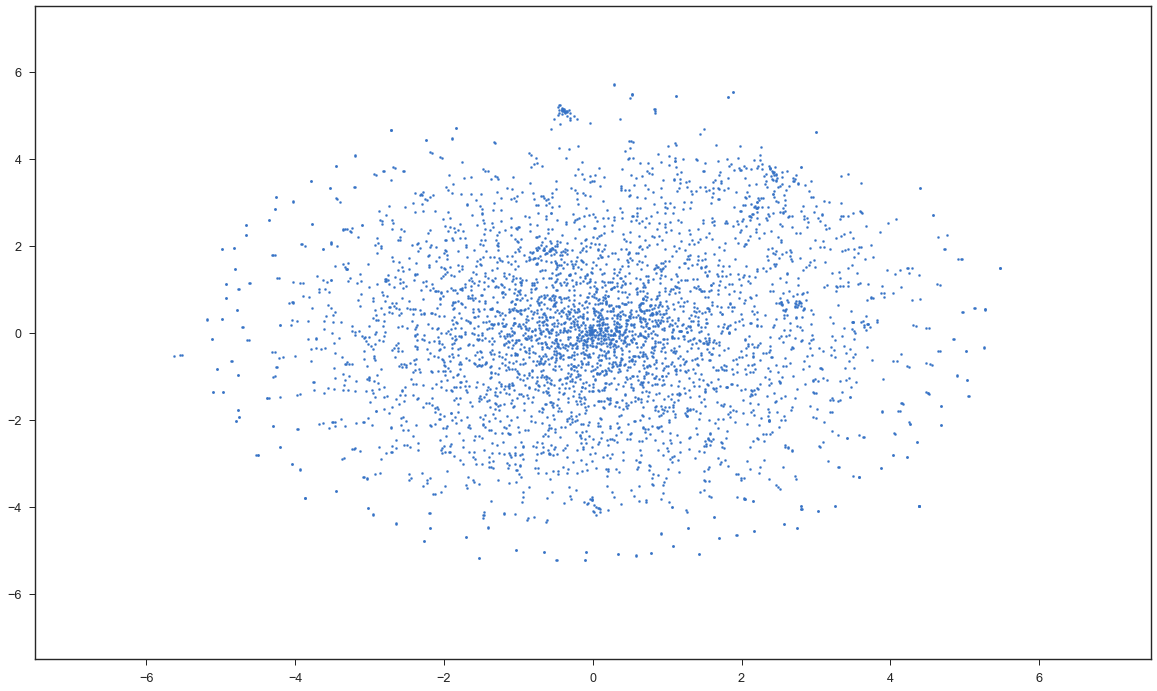

In [271]:
# create a scatterplot of the resulting 2-dimensional data
plt.figure(figsize=(20,12))
plt.scatter(df_tsne['x'], df_tsne['y'], s=5)
plt.xlim((-7.5,7.5))
plt.ylim((-7.5,7.5));

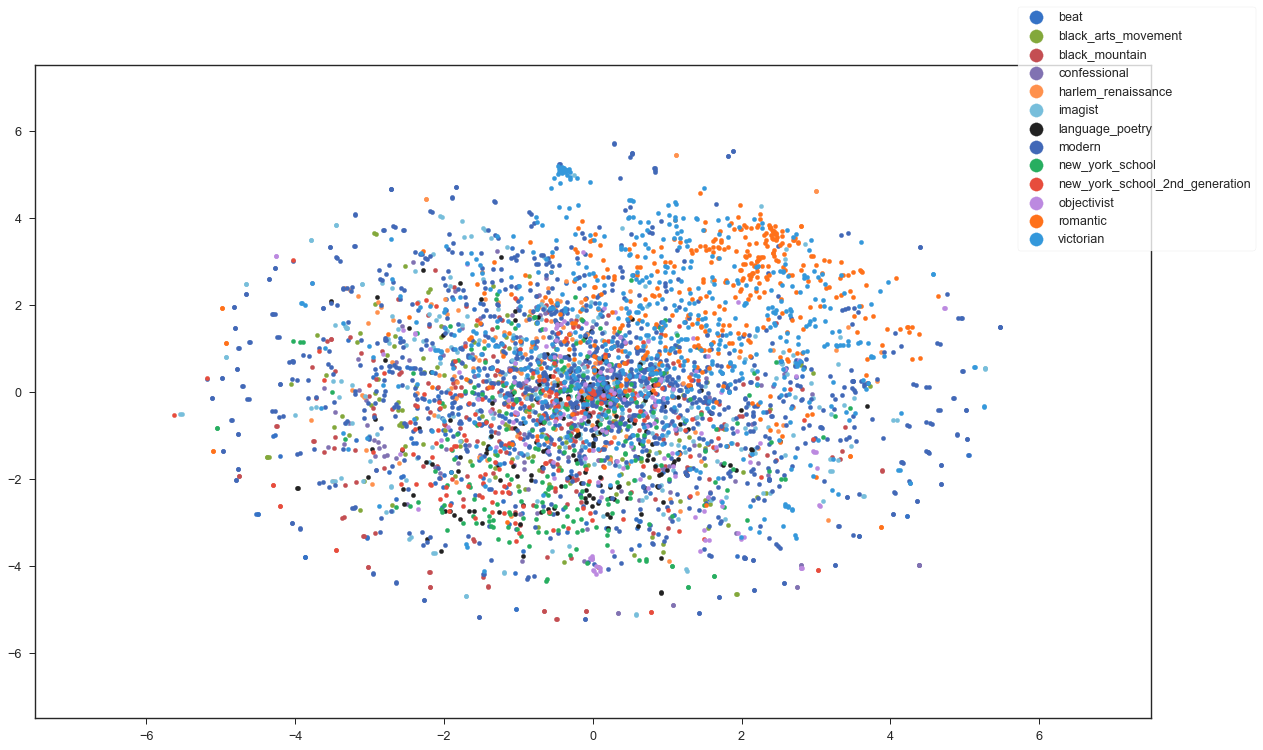

In [272]:
genres = df['genre'].unique()
# iterates through every unique beer style and plots with color
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(111)
for genre in genres:
    genre_subset = make_tsne_subset(df_tsne, df, 'genre', genre)
    plt.scatter(genre_subset['x'], genre_subset['y'], s=20)
ax.legend(genres, bbox_to_anchor=(1.1,1.1), markerscale=3)
plt.xlim((-7.5,7.5))
plt.ylim((-7.5,7.5));

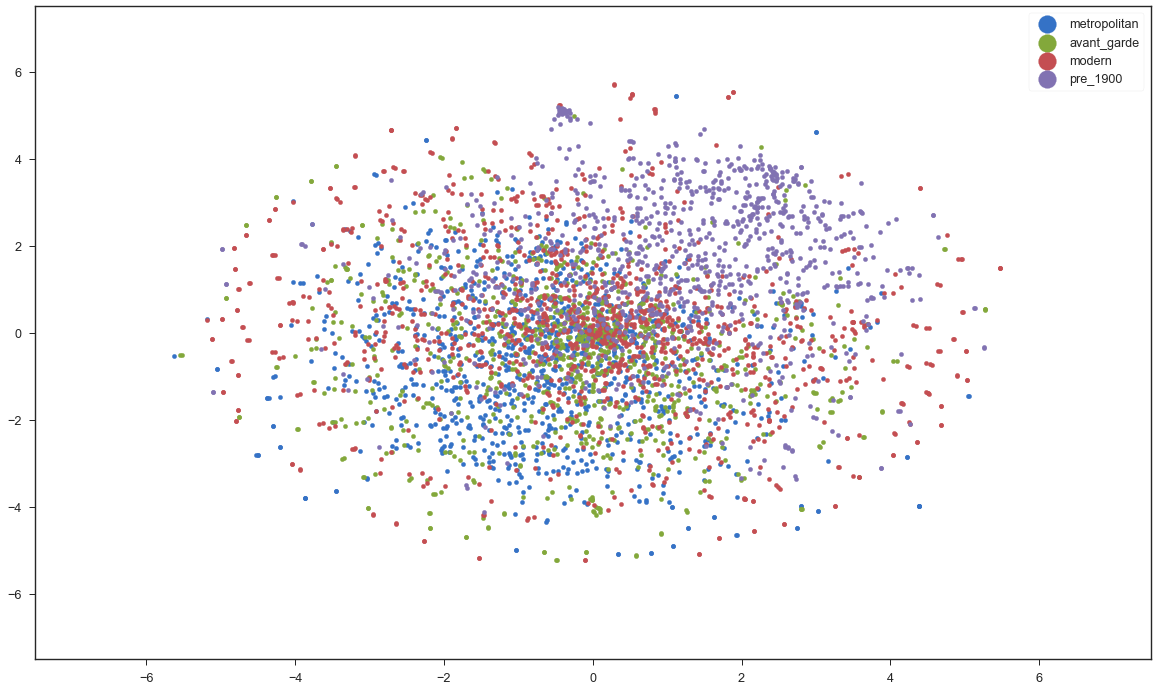

In [274]:
genres = df['umbrella_genre'].unique()
# iterates through every unique beer style and plots with color
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(111)
for genre in genres:
    genre_subset = make_tsne_subset(df_tsne, df, 'umbrella_genre', genre)
    plt.scatter(genre_subset['x'], genre_subset['y'], s=20)
ax.legend(genres, bbox_to_anchor=(1,1), markerscale=4)
ax.set_xlim((-7.5,7.5))
ax.set_ylim((-7.5,7.5));

In [119]:
model.train(model_corpus, total_examples=model.corpus_count, epochs=model.epochs)

In [179]:
model.save('data/doc2vec.model')

In [176]:
# uncomment to save
with gzip.open('data/doc2vec_model.pkl', 'wb') as goodbye:
    pickle.dump(df, goodbye, protocol=pickle.HIGHEST_PROTOCOL)
    
# # uncomment to load
# with gzip.open('data/doc2vec_model.pkl', 'rb') as hello:
#     model = pickle.load(hello)

[autoreload of botocore.session failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/botocore/session.py", line 51, in <module>
    from botocore.compat import Mutab

In [20]:
df.head()

,title,poet,genre,umbrella_genre,num_lines,avg_len_line,sentiment_polarity,end_rhyme,poem_url,string_titled
0,At the California Institute of Technology,Richard Brautigan,beat,metropolitan,4,6.000000,positive,0,https://www.poetryfoundation.org/poems/48578/at-the-california-institute-of-technology,At the California Institute of Technology I don’t care how God-damn smart these guys are: I’m bored. It’s been raining like hell all day long and ...
1,A Boat,Richard Brautigan,beat,metropolitan,17,2.647059,negative,0,https://www.poetryfoundation.org/poems/48576/a-boat,A Boat O beautiful was the werewolf in his evil forest. We took him to the carnival and he started crying when he saw the Ferris wheel. Electric g...
2,December 30,Richard Brautigan,beat,metropolitan,6,5.500000,positive,1,https://www.poetryfoundation.org/poems/48580/december-30,December 30 At 1:03 in the morning a fart smells like a marriage between an avocado and a fish head. I have to get out of bed to write this down w...
3,The Double-Bed Dream Gallows,Richard Brautigan,beat,metropolitan,17,3.176471,positive,0,https://www.poetryfoundation.org/poems/48579/the-double-bed-dream-gallows,"The Double-Bed Dream Gallows Driving through hot brushy country in the late autumn, I saw a hawk crucified on a barbed-wire fence. I guess as a ki..."
4,Haiku Ambulance,Richard Brautigan,beat,metropolitan,4,3.250000,neutral,0,https://www.poetryfoundation.org/poems/48581/haiku-ambulance,Haiku Ambulance A piece of green pepper fell off the wooden salad bowl: so what?


In [187]:
'automobile' in model.wv.vocab.keys()

True

In [277]:
poem_similarity_jup('Haiku Ambulance', df, model, num_poems=5, to_print=True)

50.7% match
WINDROWING by Bernadette Mayer
GENRE: Language Poetry
URL: https://www.poetryfoundation.org/poetrymagazine/poems/58772/windrowing
----------------------------------------------------------------------------------------------------
50.5% match
BILL GEORGE by Malcolm Cowley
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/17376/bill-george
----------------------------------------------------------------------------------------------------
49.3% match
MORTALS by E. E. Cummings
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/22218/mortals
----------------------------------------------------------------------------------------------------
48.5% match
A WHITE HUNTER by Gertrude Stein
GENRE: Modern
URL: https://www.poetryfoundation.org/poems/51213/a-white-hunter
----------------------------------------------------------------------------------------------------
48.2% match
FISH & CHIPS by Bernadette Mayer
GENRE: Language Poetry
URL:

[(1420, 0.507020115852356),
 (1543, 0.5048966407775879),
 (1628, 0.49345138669013977),
 (2280, 0.48548033833503723),
 (1419, 0.4818863272666931)]

In [275]:
word_similarity_jup('ambulance', df, model)

precomputing L2-norms of doc weight vectors


32.9% match
THE WRECK ON THE A-222 IN RAVENSBOURNE VALLEY by Jonathan Williams
GENRE: Black Mountain
URL: https://www.poetryfoundation.org/poems/54578/the-wreck-on-the-a-222-in-ravensbourne-valley
----------------------------------------------------------------------------------------------------
32.4% match
HIS PRESENCE by H. D.
GENRE: Imagist
URL: https://www.poetryfoundation.org/poetrymagazine/poems/20006/his-presence
----------------------------------------------------------------------------------------------------
31.5% match
A PRETTY A DAY by E. E. Cummings
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/22655/a-pretty-a-day
----------------------------------------------------------------------------------------------------
31.4% match
BY CANDLELIGHT by Edith Sitwell
GENRE: Modern
URL: https://www.poetryfoundation.org/poems/53976/by-candlelight
----------------------------------------------------------------------------------------------------
30.7% matc

[(568, 0.3288632035255432),
 (942, 0.3242070972919464),
 (1640, 0.3154715895652771),
 (2225, 0.31435632705688477),
 (330, 0.3068379759788513)]

In [254]:
df[df.title == 'Dreams']

,title,poet,genre,umbrella_genre,num_lines,avg_len_line,sentiment_polarity,end_rhyme,poem_url,string_titled
230,Dreams,Nikki Giovanni,black_arts_movement,metropolitan,19,3.894737,positive,0,https://www.poetryfoundation.org/poems/48224/dreams-56d229494e255,Dreams in my younger years before i learned black people aren’t suppose to dream i wanted to be a raelet and say “dr o wn d in my youn tears” or “...
770,Dreams,Langston Hughes,harlem_renaissance,metropolitan,8,4.000000,positive,1,https://www.poetryfoundation.org/poems/150995/dreams-5d767850da976,Dreams Hold fast to dreams For if dreams die Life is a broken-winged bird That cannot fly. Hold fast to dreams For when dreams go Life is a barren...


In [278]:
text_similarity_jup('In the dog days of summer as muslin curls on its own heat\
And crickets cry in the black walnut tree\
The wind lifts up my life\
And sets it some distance from where it was.\
Still Marco Polo Airport wore me out,\
I slept in a plastic chair, took the water taxi.\
Early, too early the voices of children\
Mimicking the clatter in the Internet café\
In Campo Santo Stefano in a place of black coffee\
Bordellos of verse, bony accolades of joy,\
Saint Stephen stooped over a cross,\
A dog licking his heel, blood drops from a sign\
By the church wall—Anarchia è ordine—\
The refugee from Istria gathers up nails.\
She will cobble together a gondola with bits of driftwood\
Cast off the shores of the hunger-bitten Adriatic.\
In wind off the lagoon,\
A child hops in numbered squares, back and forth, back and forth,\
Cap on his head, rhymes cool as bone in his mouth.\
Whose child is he?\
No one will answer me.\
Voices from the music academy pour into sunlight\
That strikes the malarial wealth of empire,\
Dreams of an old man in terrible heat,\
Hands bound with coarse cloth, tethered to a scaffold,\
Still painting waves on the walls of the Palazzo Ducale.', df, model)

46.6% match
AN INTERIM by Denise Levertov
GENRE: Black Mountain
URL: https://www.poetryfoundation.org/poetrymagazine/poems/31054/an-interim
----------------------------------------------------------------------------------------------------
45.3% match
AWAKING IN NEW YORK by Maya Angelou
GENRE: Black Arts Movement
URL: https://www.poetryfoundation.org/poems/48988/awaking-in-new-york
----------------------------------------------------------------------------------------------------
44.4% match
WANDERINGS CHAMPS DHONNEUR  by Ernest M. Hemingway
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/15885/wanderings-champs-dhonneur-56d20918e2c28
----------------------------------------------------------------------------------------------------
44.2% match
CHAPTER HEADING by Ernest M. Hemingway
GENRE: Modern
URL: https://www.poetryfoundation.org/poems/47271/chapter-heading
--------------------------------------------------------------------------------------------------

[(504, 0.46601366996765137),
 (147, 0.4529673755168915),
 (1770, 0.4436357915401459),
 (1761, 0.4418104290962219),
 (1769, 0.4376802444458008)]

In [240]:
poem_similarity_jup('At Fairbanks', df, model, num_poems=5, to_print=True)

48.7% match
GEORGE JOSLIN ON LA MENKEN by Edgar Lee Masters
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/14424/george-joslin-on-la-menken
----------------------------------------------------------------------------------------------------
47.9% match
HAIKU AMBULANCE by Richard Brautigan
GENRE: Beat
URL: https://www.poetryfoundation.org/poems/48581/haiku-ambulance
----------------------------------------------------------------------------------------------------
45.6% match
FOR MY DEAD & LOVED ONES by Ntozake Shange
GENRE: Black Arts Movement
URL: https://www.poetryfoundation.org/poems/148921/for-my-dead-loved-ones
----------------------------------------------------------------------------------------------------
44.2% match
MY OFFICE by Lorenzo Thomas
GENRE: Black Arts Movement
URL: https://www.poetryfoundation.org/poems/53345/my-office
----------------------------------------------------------------------------------------------------
43.7% match
MARGARET

[(2012, 0.48710376024246216),
 (4, 0.4787011742591858),
 (280, 0.45643165707588196),
 (292, 0.4416061043739319),
 (1991, 0.43715599179267883)]

# FIRST MODEL RESULTS

In [41]:
poem_similarity('Haiku Ambulance', df, model, num_poems=5, to_print=True)

61.5% match
THE PURITAN ETHOS by Robert Creeley
GENRE: Black Mountain
URL: https://www.poetryfoundation.org/poetrymagazine/poems/30990/the-puritan-ethos
----------------------------------------------------------------------------------------------------
60.4% match
“A MONSTER OWL” by Lorine Niedecker
GENRE: Objectivist
URL: https://www.poetryfoundation.org/poetrymagazine/poems/56428/a-monster-owl
----------------------------------------------------------------------------------------------------
60.4% match
SIX by E. E. Cummings
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/22223/six
----------------------------------------------------------------------------------------------------
58.9% match
TIME THE HANGMAN by William Carlos Williams
GENRE: Imagist
URL: https://www.poetryfoundation.org/poetrymagazine/poems/14351/time-the-hangman
----------------------------------------------------------------------------------------------------
58.2% match
PERSPICUITY by 

[(388, 0.6150802373886108),
 (3201, 0.6043911576271057),
 (1643, 0.604366660118103),
 (1239, 0.588645339012146),
 (2042, 0.5816758871078491)]

In [244]:
from sklearn.manifold import TSNE

In [245]:
# doc_tags is just a list of every unique document tag/beer_id
doc_tags = [tag[1][0] for tag in model_corpus]
# get the vector for each doc_tag
X = model[doc_tags]
# Fit and transform a t-SNE object with the vector data for dimensionality reduction
tsne = TSNE(n_components=2,
            perplexity=50,
            learning_rate=10,
            n_iter=5000,
            n_jobs=-1, random_state=42)
X_tsne = tsne.fit_transform(X)
df_tsne = pd.DataFrame(X_tsne, index=doc_tags, columns=['x', 'y'])

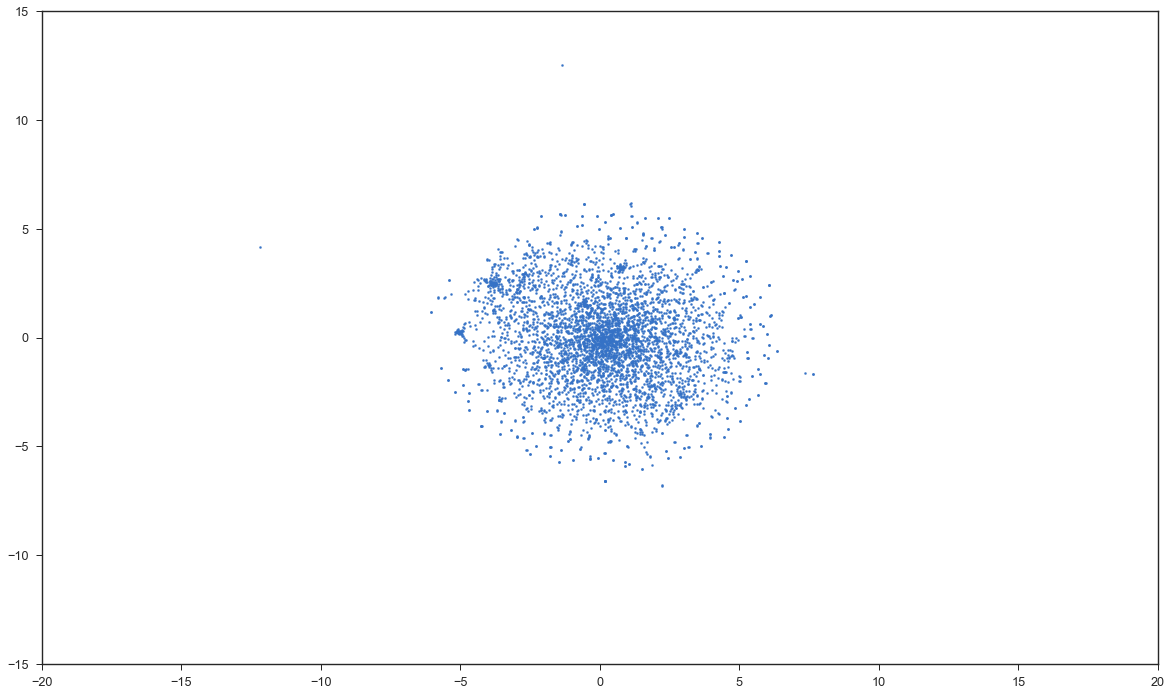

In [248]:
# create a scatterplot of the resulting 2-dimensional data
plt.figure(figsize=(20,12))
plt.scatter(df_tsne['x'], df_tsne['y'], s=5)
plt.xlim((-20,20))
plt.ylim((-15,15));

In [249]:
# CURRENT
tsne.kl_divergence_

3.498462438583374

In [148]:
tsne.n_iter_

2599

In [142]:
# FORMER
tsne.kl_divergence_

3.1930837631225586

In [115]:
# FORMER
tsne.kl_divergence_

3.5206422805786133

In [55]:
from functions_recs import make_tsne_subset

In [59]:
umbrella_genres

array(['metropolitan', 'avant_garde', 'modern', 'pre_1900'], dtype=object)

In [61]:
df.shape

(4376, 10)

In [63]:
df_tsne.shape

(4376, 2)

In [66]:
df.umbrella_genre.value_counts()

modern          1279
metropolitan    1092
pre_1900        1041
avant_garde      964
Name: umbrella_genre, dtype: int64

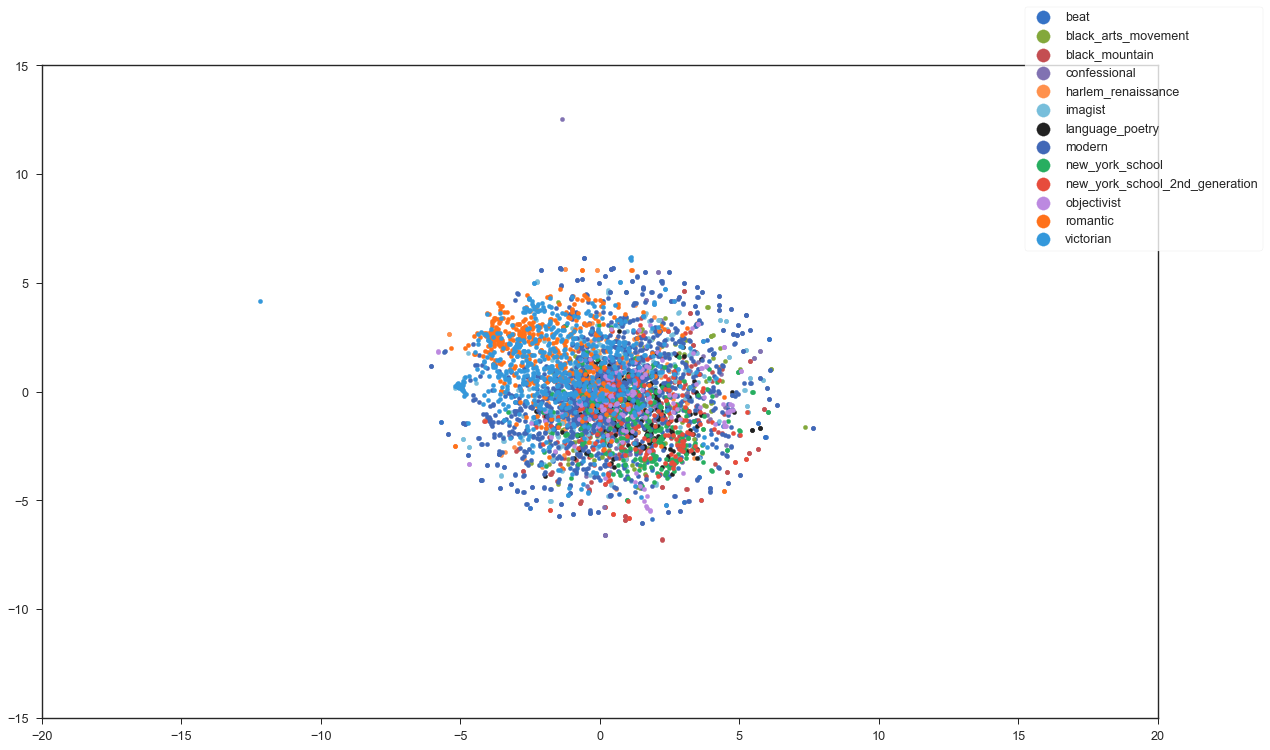

In [250]:
genres = df['genre'].unique()
# iterates through every unique beer style and plots with color
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(111)
for genre in genres:
    genre_subset = make_tsne_subset(df_tsne, df, 'genre', genre)
    plt.scatter(genre_subset['x'], genre_subset['y'], s=20)
ax.legend(genres, bbox_to_anchor=(1.1,1.1), markerscale=3)
ax.set_xlim((-20,20))
ax.set_ylim((-15,15));

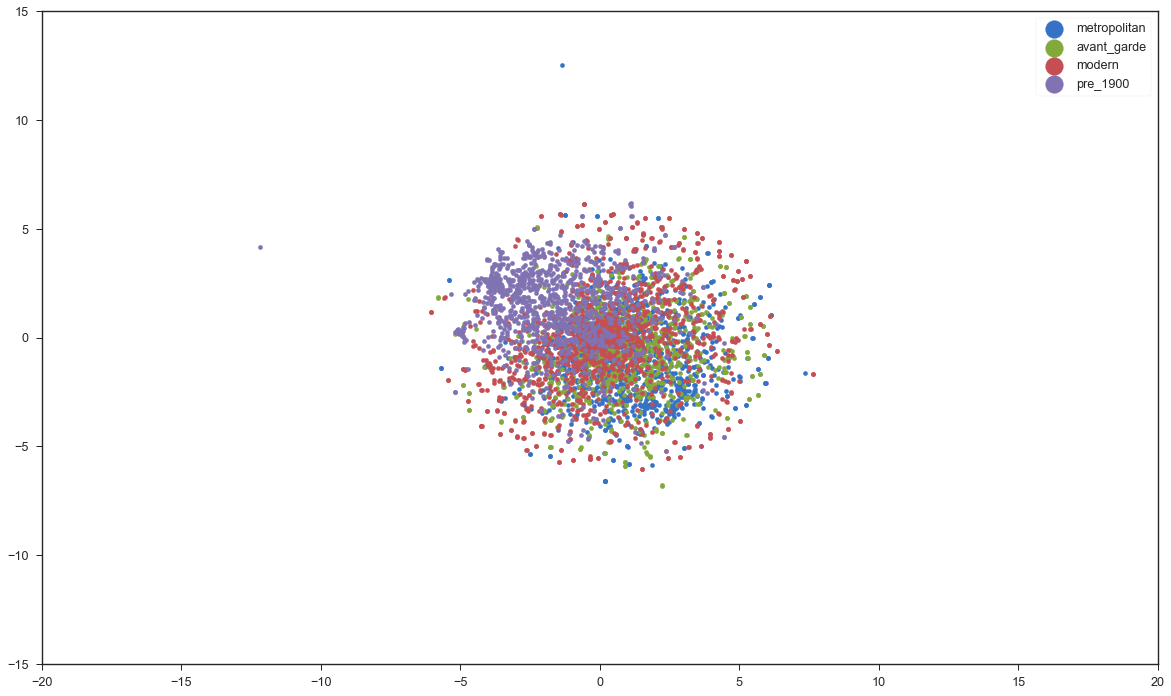

In [251]:
genres = df['umbrella_genre'].unique()
# iterates through every unique beer style and plots with color
fig = plt.figure(figsize=(20,12))
ax = plt.subplot(111)
for genre in genres:
    genre_subset = make_tsne_subset(df_tsne, df, 'umbrella_genre', genre)
    plt.scatter(genre_subset['x'], genre_subset['y'], s=20)
ax.legend(genres, bbox_to_anchor=(1,1), markerscale=4)
ax.set_xlim((-20,20))
ax.set_ylim((-15,15));

In [180]:
word_similarity('hell', df, model)

37.0% match
PURPLE ANEMONES by D. H. Lawrence
GENRE: Modern
URL: https://www.poetryfoundation.org/poems/148469/purple-anemones
----------------------------------------------------------------------------------------------------
32.3% match
ELEGY BEFORE DEATH by Cecil Day-Lewis
GENRE: Modern
URL: https://www.poetryfoundation.org/poetrymagazine/poems/26050/elegy-before-death
----------------------------------------------------------------------------------------------------
29.3% match
SISTER HELEN by Dante Gabriel Rossetti
GENRE: Victorian
URL: https://www.poetryfoundation.org/poems/45024/sister-helen
----------------------------------------------------------------------------------------------------
29.2% match
THE ABRACADABRA BOYS by Carl Sandburg
GENRE: Modern
URL: https://www.poetryfoundation.org/poems/53235/the-abracadabra-boys
----------------------------------------------------------------------------------------------------
29.2% match
SONNETS FROM THE PORTUGUESE  7: THE FACE OF

[(1878, 0.3699212074279785),
 (1664, 0.3230493366718292),
 (4217, 0.2931671440601349),
 (2104, 0.2924536466598511),
 (3809, 0.2921462059020996)]

In [188]:
df.num_lines.describe()


count    4376.000000
mean       35.506170
std        58.407807
min         1.000000
25%        14.000000
50%        21.000000
75%        32.000000
max       892.000000
Name: num_lines, dtype: float64

In [189]:
df.num_lines.max()

892

In [190]:
df.avg_len_line.describe()

count    4376.000000
mean        6.790270
std        13.657567
min         1.000000
25%         4.961538
50%         6.200000
75%         7.413690
max       808.000000
Name: avg_len_line, dtype: float64

In [203]:
import streamlit as st

[autoreload of functions_recs failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/p.szymo/Documents/flatiron/projects/mod5/poetry_genre_classifier/functions_recs.py", line 1, in <module>
    import streamlit as st
 

ContextualVersionConflict: (botocore 1.12.234 (/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages), Requirement.parse('botocore>=1.13.44'), {'streamlit'})

In [204]:
df.end_rhyme_ratio.describe()

[autoreload of functions_recs failed: Traceback (most recent call last):
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/opt/anaconda3/envs/learn-env/lib/python3.6/importlib/__init__.py", line 166, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 618, in _exec
  File "<frozen importlib._bootstrap_external>", line 678, in exec_module
  File "<frozen importlib._bootstrap>", line 219, in _call_with_frames_removed
  File "/Users/p.szymo/Documents/flatiron/projects/mod5/poetry_genre_classifier/functions_recs.py", line 1, in <module>
    import streamlit as st
 

AttributeError: 'DataFrame' object has no attribute 'end_rhyme_ratio'